In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('D:\csv\\experiment new.csv')
print(data)

            id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  Wh

In [7]:
df = pd.read_csv('experiment new.csv')
df.shape

(404290, 6)

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
13817,13817,26501,26502,What universities does GAIN Capital recruit ne...,What universities does Apple Capital recruit n...,0
358795,358795,488342,488343,Which colleges shall I apply under CAT (77.5 p...,I have got 92 percentile in CAT 2015. What col...,0
311085,311085,70710,435305,How much does a full sleeve tattoo (from wrist...,Is a half sleeve tattoo worth the cost?,0
7800,7800,15226,15227,"Besides 01 and D2 steel types, what are good k...",How can I make a metal crown?,0
41665,41665,489,39243,If dark energy is created with expansion can i...,"If vacuum energy is created as space expands, ...",1
376609,376609,264491,507782,Would you push a button for one million dollar...,"If you could press a button and get $1,000,000...",1
380760,380760,512411,512412,Why are reservations are given to children of ...,Valuelabs aptitude pattern?,0
139016,139016,221240,221241,"Is this world for the strong only, good deeds ...",Are good deeds bullshit?,0
152331,152331,239342,239343,Which is biggest city in india?,What are the biggest cities in India?,0
337787,337787,465277,465278,Is it possible to merge two YouTube accounts?,Can I merge two YouTube channels under the sam...,0


In [11]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


In [14]:
#check how many duplicate and non-duplicate questions.
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)


is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


In [15]:
#calculating total reapitimg questions??

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 808580
Number of questions getting repeated 111780


In [16]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [17]:
df = df.sample(20000)

In [18]:
df.duplicated().sum()

0

In [19]:
#creating new dataframe for only question1 and question2..
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
212916,What are all the strengths and weakness of a l...,What are your IT strengths and weaknesses?
177824,How do Native American tribes commemorate deat...,How do Native American tribes commemorate deat...
399526,What does it feel like to live in a RV or trai...,What is it like to live in an RV or other (tru...
66281,Where is the best hangout cafe in Hyderabad?,What are the best places to hangout for couple...
140767,"Who is better: Raftaar, Yo Yo Honey Sing, or B...",Is it not Jeevatma attaches with the materials...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#Making list of  questions with 20000 data sample.
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
#splitting the question into two parts each part is of 20000 questions.
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [21]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape 

(20000, 6000)

In [22]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
212916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
177824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
227634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [26]:
temp_df['is_duplicate'] = df['is_duplicate']

In [27]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
212916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
177824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
new_df = df.sample(20000,random_state=2)

In [29]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [30]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0


In [31]:
new_df.duplicated().sum()

0

is_duplicate
0    12597
1     7403
Name: count, dtype: int64
is_duplicate
0    62.985
1    37.015
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

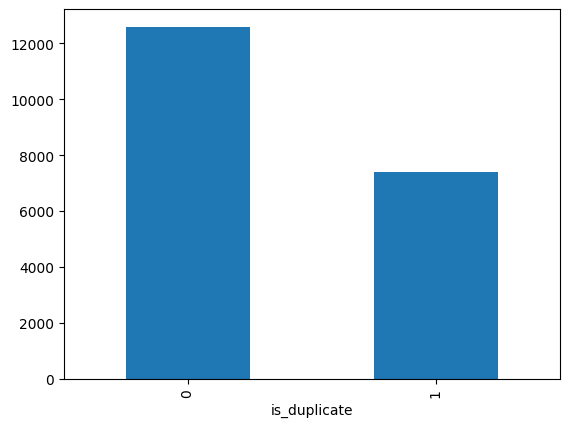

In [32]:
# Distribution of duplicate and non-duplicate questions in 20000 questions???

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [33]:
#  now let's see the Repeated questions????

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 37673
Number of questions getting repeated 1836


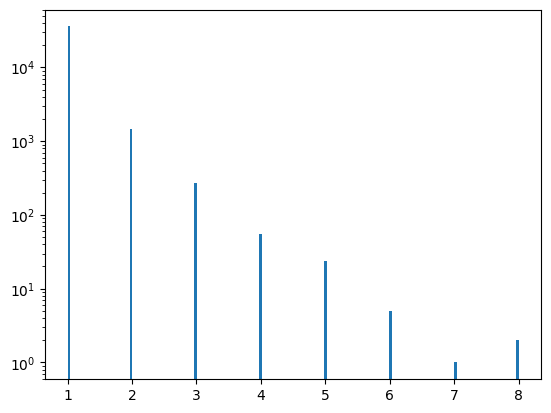

In [34]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [35]:
# Features including are:- Taking length 
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [36]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1,60,41
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1,46,38
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1,47,42
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,71
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0,43,43


In [37]:
#no of words:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1,60,41,10,7
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1,46,38,10,8
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1,47,42,10,8
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,71,13,13
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0,43,43,11,8


In [38]:
#common words: 
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [39]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1,60,41,10,7,6
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1,46,38,10,8,6
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1,47,42,10,8,6
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,71,13,13,12
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0,43,43,11,8,2


In [40]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [41]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1,60,41,10,7,6,15
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1,46,38,10,8,6,18
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1,47,42,10,8,6,18
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,71,13,13,12,26
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0,43,43,11,8,2,19


In [42]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,105372,173773,173774,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?,1,60,41,10,7,6,15,0.40
62014,62014,108167,108168,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?,1,46,38,10,8,6,18,0.33
391234,391234,42586,29377,What is the most painless and quick way to die?,What is the most effective way to suicide?,1,47,42,10,8,6,18,0.33
298120,298120,322784,30154,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,71,13,13,12,26,0.46
259706,259706,148536,99649,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?,0,43,43,11,8,2,19,0.11


minimum characters 3
maximum characters 315
average num of characters 59


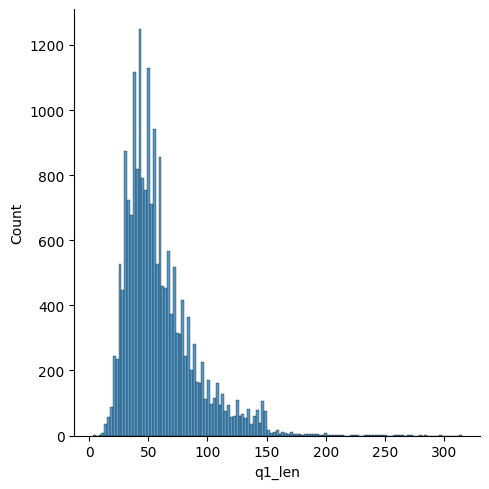

In [43]:
# Analysiying the features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum words 1
maximum words 63
average num of words 10


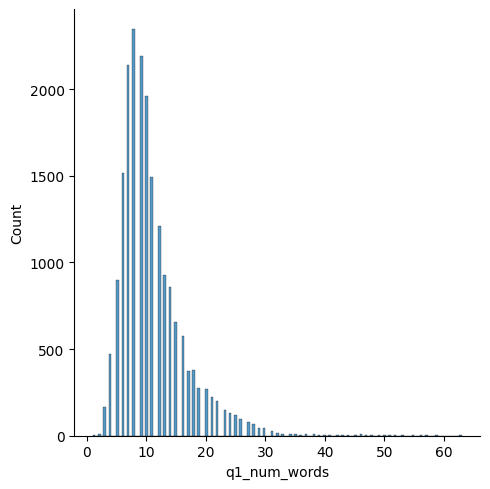

In [44]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


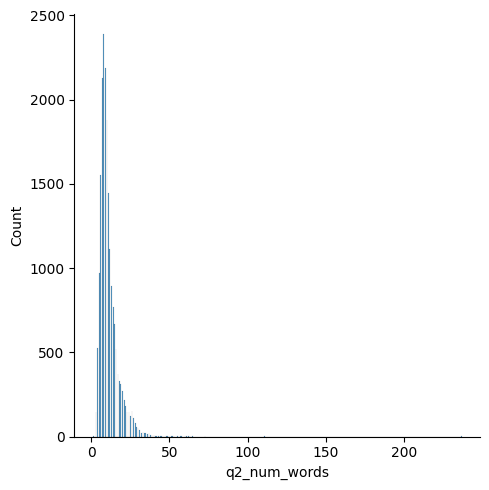

In [41]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

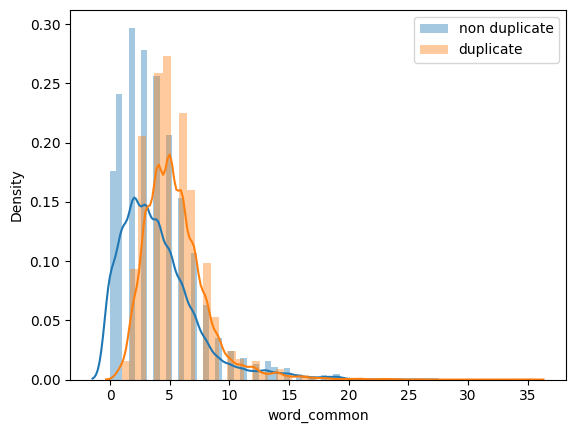

In [45]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

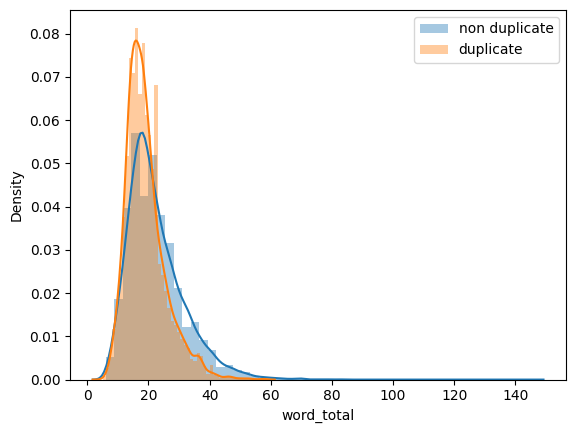

In [43]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

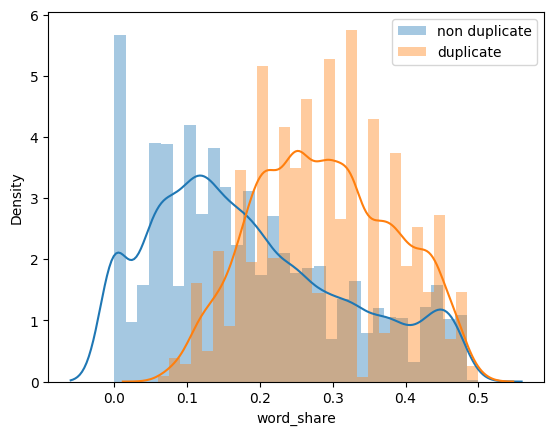

In [46]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [47]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
105372,What are the best restaurants in Haarlem in Th...,What are the best restaurants in Haarlem?
62014,Which is the best song of Asha Bhosle and why?,Which is the best song by Asha Bhosle?
391234,What is the most painless and quick way to die?,What is the most effective way to suicide?
298120,What individuals and events in history are a s...,What individuals and events in history are a s...
259706,How can I get rid of dark spots on my face?,How do you remove blemishes from your face?


In [48]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(20000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,1,60,41,10,7,6,15,0.40
62014,1,46,38,10,8,6,18,0.33
391234,1,47,42,10,8,6,18,0.33
298120,0,71,71,13,13,12,26,0.46
259706,0,43,43,11,8,2,19,0.11


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 6000)

In [51]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(20000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
105372,1,60,41,10,7,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0
62014,1,46,38,10,8,6,18,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
391234,1,47,42,10,8,6,18,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
298120,0,71,71,13,13,12,26,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
259706,0,43,43,11,8,2,19,0.11,0,0,...,0,0,1,0,0,1,0,0,0,0


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.76175

In [54]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace some special characters with their string values.
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [55]:
preprocess("I'm going to give my 100% to this work.")

'i am going to give my 100 percent to this work'

In [56]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [57]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,60,41,10,7,6,15,0.40
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,46,38,10,8,6,18,0.33
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,47,42,10,8,6,18,0.33
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,71,71,13,13,12,26,0.46
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,43,43,11,8,2,19,0.11


In [58]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [59]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,6,15,0.40
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,6,18,0.33
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,6,18,0.33
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,12,26,0.46
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,2,19,0.11


In [61]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [62]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,7,15,0.40
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,7,18,0.33
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,6,18,0.33
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,12,26,0.46
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,2,19,0.11


In [63]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [64]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,7,15,0.40
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,7,18,0.33
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,6,18,0.33
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,12,26,0.46
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,2,19,0.11


In [66]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
113914,113914,186044,186045,is it true that the byzantine empire was the m...,how is barclaycard minimum payment calculated,0,73,45,15,6,1,20,0.05
226379,226379,334967,334968,what are some ways to boost creativity,what are the best ways to boost creativity,1,38,42,7,8,6,15,0.40
11461,11461,22130,22131,which is the best version of linux,what is the best linux desktop environment,0,34,42,7,7,4,14,0.29
325391,325391,451632,451633,what would happen if i write in my statement o...,what if i write in my statement of purpose ap...,1,160,147,32,30,26,53,0.49
135303,135303,216108,103607,why did the 2008 financial crisis occur,in layman s terms what caused the 2008 financ...,1,39,56,7,11,4,18,0.22


In [65]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [66]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [67]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,...,15,0.40,0.999967,0.749981,0.999975,0.999975,0.999986,0.699993,0.0,1.0
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,...,18,0.33,0.999975,0.999975,0.749981,0.499992,0.874989,0.699993,0.0,1.0
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,...,18,0.33,0.333322,0.249994,0.999980,0.833319,0.749991,0.599994,0.0,1.0
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,...,26,0.46,0.833319,0.833319,0.999986,0.999986,0.923070,0.923070,0.0,1.0
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,...,19,0.11,0.333322,0.199996,0.199996,0.166664,0.249997,0.181817,1.0,1.0


In [68]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [69]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [70]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,...,0.749981,0.999975,0.999975,0.999986,0.699993,0.0,1.0,3.0,8.5,0.975610
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,...,0.999975,0.749981,0.499992,0.874989,0.699993,0.0,1.0,2.0,9.0,0.605263
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,...,0.249994,0.999980,0.833319,0.749991,0.599994,0.0,1.0,2.0,9.0,0.404762
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,...,0.833319,0.999986,0.999986,0.923070,0.923070,0.0,1.0,0.0,13.0,0.915493
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,...,0.199996,0.199996,0.166664,0.249997,0.181817,1.0,1.0,3.0,9.5,0.116279


In [71]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [73]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [74]:
print(new_df.shape)
new_df.head()

(20000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
105372,105372,173773,173774,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem,1,59,40,10,7,...,0.699993,0.0,1.0,3.0,8.5,0.975610,81,100,81,100
62014,62014,108167,108168,which is the best song of asha bhosle and why,which is the best song by asha bhosle,1,45,37,10,8,...,0.699993,0.0,1.0,2.0,9.0,0.605263,85,95,83,96
391234,391234,42586,29377,what is the most painless and quick way to die,what is the most effective way to suicide,1,46,41,10,8,...,0.599994,0.0,1.0,2.0,9.0,0.404762,67,61,71,72
298120,298120,322784,30154,what individuals and events in history are a s...,what individuals and events in history are a s...,0,70,70,13,13,...,0.923070,0.0,1.0,0.0,13.0,0.915493,94,94,91,96
259706,259706,148536,99649,how can i get rid of dark spots on my face,how do you remove blemishes from your face,0,42,42,11,8,...,0.181817,1.0,1.0,3.0,9.5,0.116279,45,45,43,40


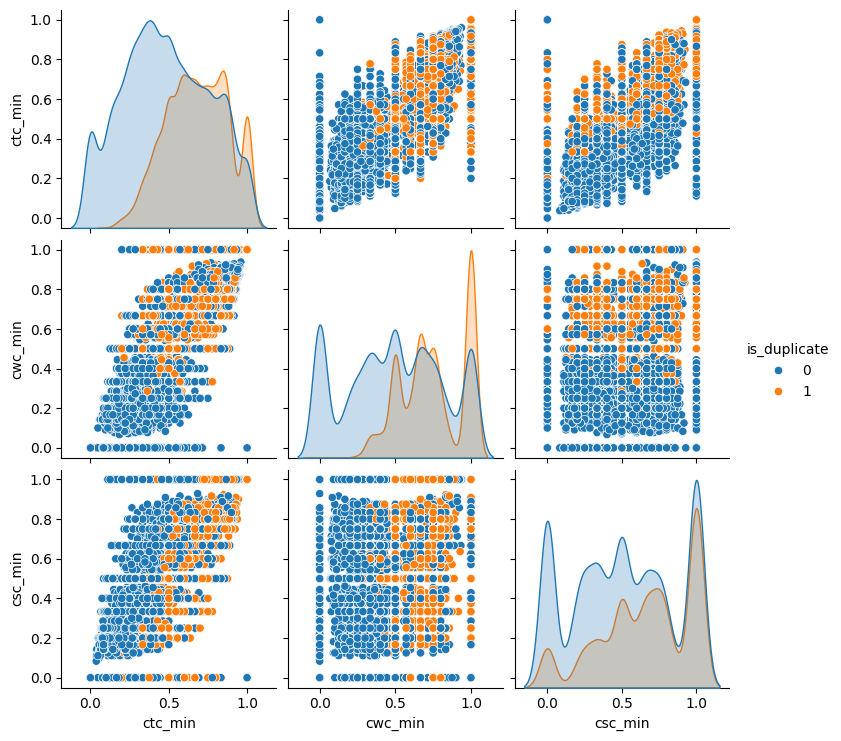

In [81]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

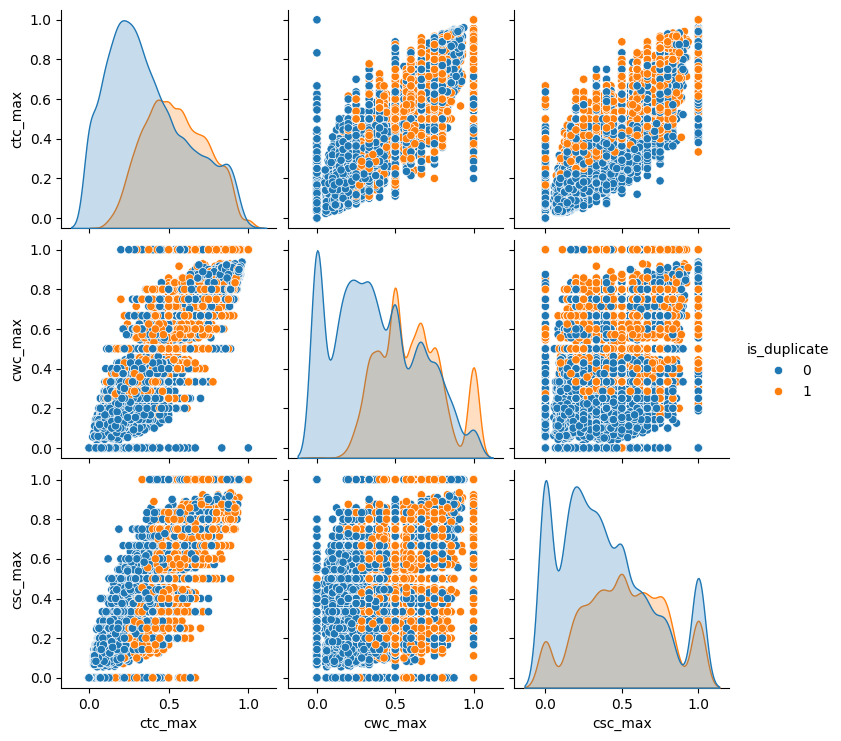

In [82]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

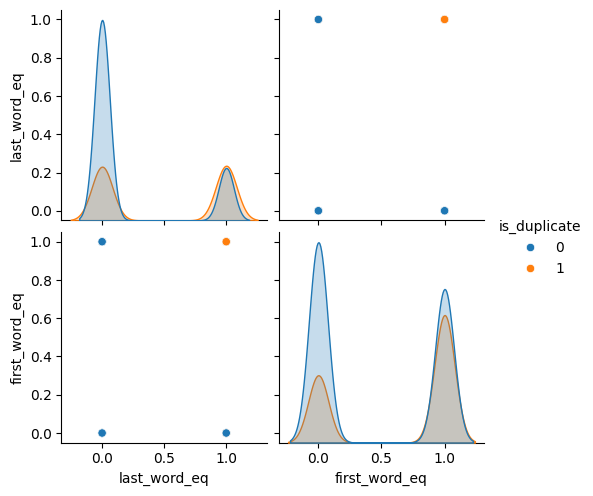

In [75]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

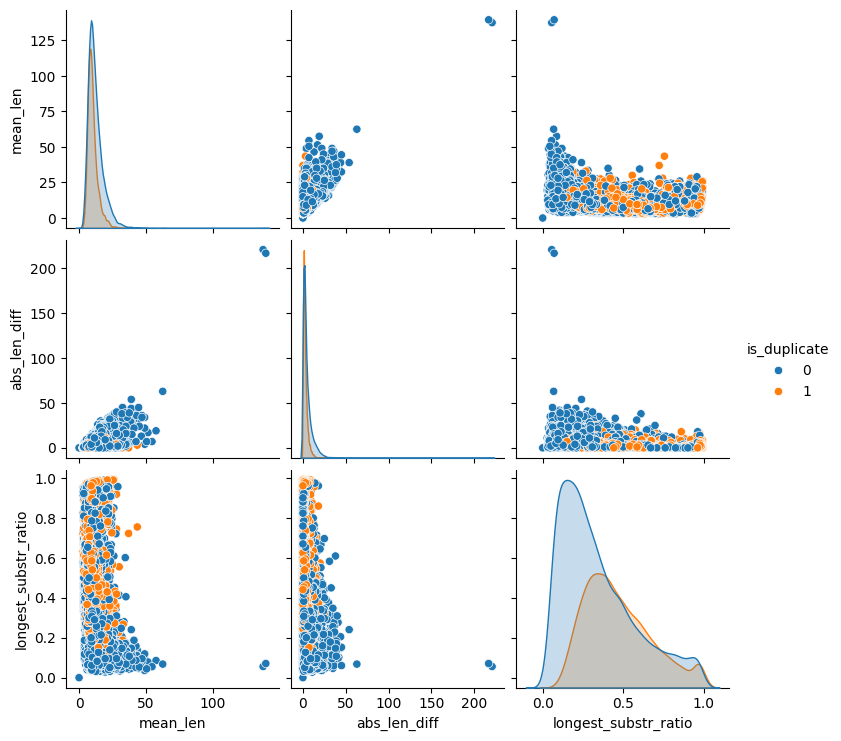

In [76]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

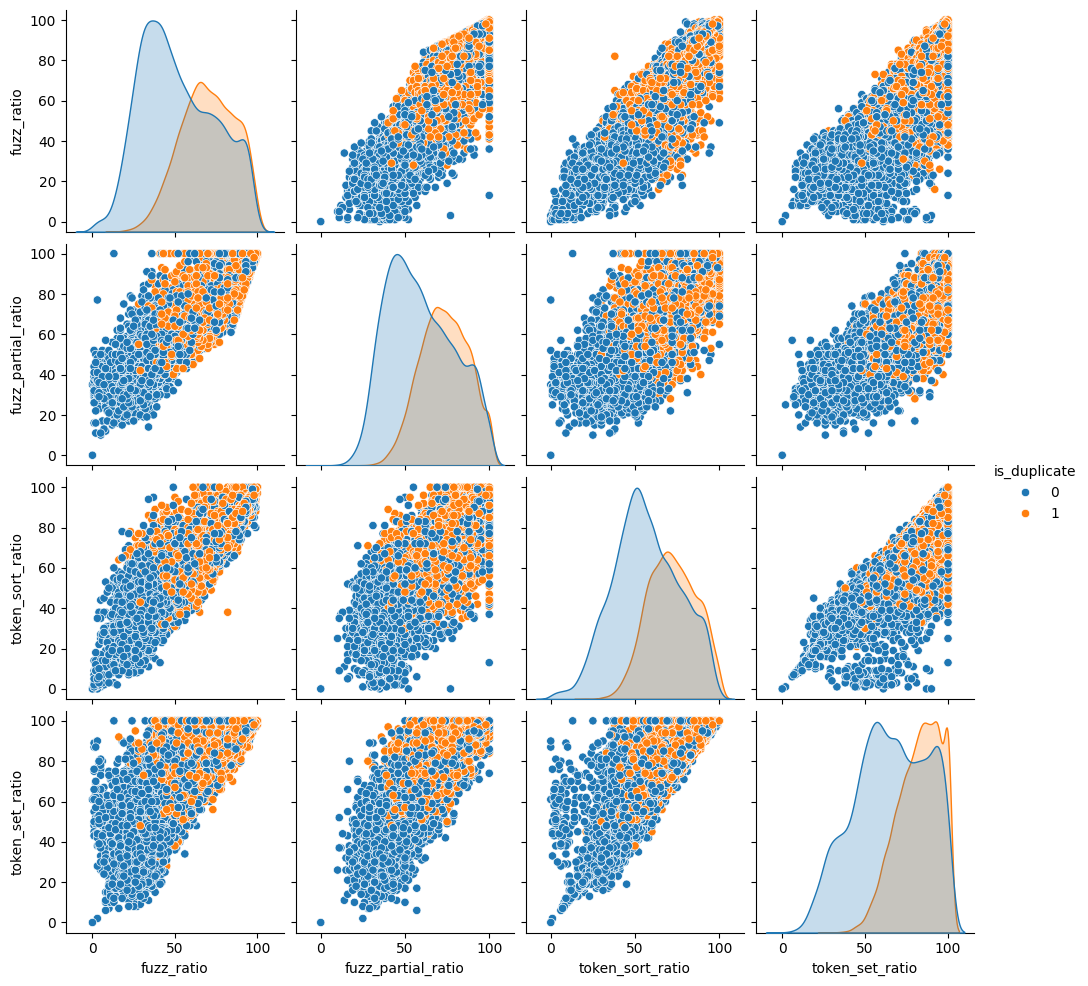

In [77]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [78]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [79]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.134s...
[t-SNE] Computed neighbors for 20000 samples in 8.820s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

In [83]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
105372,what are the best restaurants in haarlem in th...,what are the best restaurants in haarlem
62014,which is the best song of asha bhosle and why,which is the best song by asha bhosle
391234,what is the most painless and quick way to die,what is the most effective way to suicide
298120,what individuals and events in history are a s...,what individuals and events in history are a s...
259706,how can i get rid of dark spots on my face,how do you remove blemishes from your face


In [84]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(20000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
105372,1,59,40,10,7,7,15,0.40,0.999967,0.749981,...,0.699993,0.0,1.0,3.0,8.5,0.975610,81,100,81,100
62014,1,45,37,10,8,7,18,0.33,0.999975,0.999975,...,0.699993,0.0,1.0,2.0,9.0,0.605263,85,95,83,96
391234,1,46,41,10,8,6,18,0.33,0.333322,0.249994,...,0.599994,0.0,1.0,2.0,9.0,0.404762,67,61,71,72
298120,0,70,70,13,13,12,26,0.46,0.833319,0.833319,...,0.923070,0.0,1.0,0.0,13.0,0.915493,94,94,91,96
259706,0,42,42,11,8,2,19,0.11,0.333322,0.199996,...,0.181817,1.0,1.0,3.0,9.5,0.116279,45,45,43,40


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [86]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 6000)

In [87]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(20000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
105372,1,59,40,10,7,7,15,0.40,0.999967,0.749981,...,0,0,0,0,0,0,0,0,0,0
62014,1,45,37,10,8,7,18,0.33,0.999975,0.999975,...,0,0,0,0,0,0,0,0,0,0
391234,1,46,41,10,8,6,18,0.33,0.333322,0.249994,...,0,0,0,0,0,0,0,0,0,0
298120,0,70,70,13,13,12,26,0.46,0.833319,0.833319,...,0,0,0,0,0,0,0,0,0,0
259706,0,42,42,11,8,2,19,0.11,0.333322,0.199996,...,0,0,1,0,0,1,0,0,0,0


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.78225

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[2132,  402],
       [ 469,  997]], dtype=int64)

In [92]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [93]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [94]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [95]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [96]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [97]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [98]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [99]:
rf.predict(query_point_creator(q1,q4))

array([0], dtype=int64)

In [100]:
cv


CountVectorizer(max_features=3000)

In [101]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))